# Data Mining Lab 2 Report
A report of developping the model for the in-class Kaggle Competition regarding Emotion Recognition
on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2.

### Student Information
Name: 鄭水波

Student ID: 108033812

GitHub ID: Shui-Po

Kaggle name: Apollo Cheng

Date: 2023/12/24


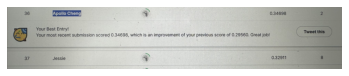

In [1]:
# Kaggle private scoreboard snapshot:

from PIL import Image
import matplotlib.pyplot as plt

# Load the image from the file
image_path = 'IMG_2530.jpg'  # Replace with your image file path
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

## 0 Index

### 1. Data Preparation
1.1 Load data
1.2 Prepare the train and test data:
1.3 Save data
### 2. Feature engineering
2.1 Using Bag of Words
2.2 Using another tokenizer in NLTK module
### 3. Model
3.1 Decision Trees
3.2 Naive Bayes
### 4. Results Evaluation
4.1 Decision Trees
4.2 Naive Bayes
### 5. Predict the precessing dataset(df_test) on Kaggle.
5.1 Decision Trees
5.2 Naive Bayes

---
## 1. Data Preparation

In [1]:
# Import the Python modules in advance.
import IPython.display
import json
import pandas as pd
import seaborn as sns
import squarify

import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
from matplotlib import pyplot as plt
import datetime

# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template

In [2]:
# Load the .json file.
import json

file_path = 'tweets_DM.json'  # Ensure this is the correct path to your file

data = []

# Open the file
with open(file_path, 'r', encoding='utf-8') as file:
    # Read and parse each line
    for line in file:
        try:
            json_object = json.loads(line)
            data.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON on line: {line}")
            print(f"Error details: {e}")

# 'data' now is a list of dictionaries, each representing a JSON object from the file

In [8]:
# Load and read the other three files.

In [10]:
data_ident=pd.read_csv("./dm2023-isa5810-lab2-homework/data_identification.csv",encoding="utf-8-sig")

In [11]:
emotion=pd.read_csv("./dm2023-isa5810-lab2-homework/emotion.csv",encoding="utf-8-sig")

In [38]:
sample=pd.read_csv("./dm2023-isa5810-lab2-homework/sampleSubmission.csv",encoding="utf-8-sig")

In [40]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411972 entries, 0 to 411971
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       411972 non-null  object
 1   emotion  411972 non-null  object
dtypes: object(2)
memory usage: 6.3+ MB


In [39]:
sample

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


In [13]:
data_ident

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [44]:
data_ident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tweet_id        object
 1   identification  object
dtypes: object(2)
memory usage: 28.5+ MB


In [23]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [26]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455563 entries, 0 to 1455562
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tweet_id  1455563 non-null  object
 1   emotion   1455563 non-null  object
dtypes: object(2)
memory usage: 22.2+ MB


In [27]:
emotion[emotion['tweet_id']=='0x3140b1']

,tweet_id,emotion
0,0x3140b1,sadness


In [28]:
sample

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


In [4]:
# Translate the .json data to dataframe.
# To create a DataFrame, we need to flatten the nested structure in '_source'
flattened_data = []
for item in data:
    flattened_record = {
        'score': item['_score'],
        'index': item['_index'],
        'crawldate': item['_crawldate'],
        'type': item['_type'],
        'tweet_id': item['_source']['tweet']['tweet_id'],
        'text': item['_source']['tweet']['text'],
        'hashtags': item['_source']['tweet']['hashtags']
    }
    flattened_data.append(flattened_record)

# Create DataFrame
df = pd.DataFrame(flattened_data)
# Now 'df' is a DataFrame containing the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   score      int64 
 1   index      object
 2   crawldate  object
 3   type       object
 4   tweet_id   object
 5   text       object
 6   hashtags   object
dtypes: int64(1), object(6)
memory usage: 99.7+ MB


In [9]:
# save the dataframe for later use.
df.to_csv("./tweets_DM_1222.csv", index = False,encoding="utf-8-sig")

In [7]:
df.head()

,score,index,crawldate,type,tweet_id,text,hashtags
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse]
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,0x2de201,"""Trust is not the same as faith. A friend is s...",[]


In [29]:
# drop the unnecessary columns in df.
dropCol = ['score','index', 'crawldate', 'type', 'hashtags']
#'mchno', 'acqic', 'stscd', 'cano'
df1 = df.drop(columns=dropCol)

In [30]:
df1

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [31]:
# Observe if there is na entry
df1.isna().any()

tweet_id    False
text        False
dtype: bool

In [32]:
#Add new column 'emotion' with the type 'object' to df1
df1['emotion'] = 0
# Ensure the new column is of type object
df1['emotion'] =df1['emotion'].astype('object')

In [35]:
da=df1
db=emotion

In [37]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tweet_id  object
 1   text      object
 2   emotion   object
dtypes: object(3)
memory usage: 42.7+ MB


In [38]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455563 entries, 0 to 1455562
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tweet_id  1455563 non-null  object
 1   emotion   1455563 non-null  object
dtypes: object(2)
memory usage: 22.2+ MB


## 1.2  Prepare the train and test data: 
Merge the df1 and emotion on the key 'tweet_id'

In [39]:
#import pandas as pd

# Assuming da and db are your pandas DataFrames
# Example:
# da = pd.DataFrame({'tweet_id': [...], 'text': [...], 'emotion': [...]})
# db = pd.DataFrame({'tweet_id': [...], 'emotion': [...]})

# Merging da with db
merged_df = pd.merge(da, db[['tweet_id', 'emotion']], on='tweet_id', how='left', suffixes=('', '_db'))

# Now, you want to replace the 'emotion' column in da with the one from db
merged_df['emotion'] = merged_df['emotion_db']
merged_df.drop(columns='emotion_db', inplace=True)

# merged_df now contains the combined data with the updated 'emotion' values

In [40]:
merged_df

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x28b412,"Confident of your obedience, I write to you, k...",NaN
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
4,0x2de201,"""Trust is not the same as faith. A friend is s...",NaN
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,NaN
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,NaN
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,NaN
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [41]:
data_ident

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [43]:
da1=merged_df
db1=data_ident

In [45]:
#Add new column 'emotion' with the type 'object' to df1
da1['identification'] = 0
# Ensure the new column is of type object
da1['identification'] =da1['identification'].astype('object')

In [46]:
#import pandas as pd

# Assuming da and db are your pandas DataFrames
# Example:
# da = pd.DataFrame({'tweet_id': [...], 'text': [...], 'emotion': [...]})
# db = pd.DataFrame({'tweet_id': [...], 'emotion': [...]})

# Merging da with db
merged_df1 = pd.merge(da1, db1[['tweet_id', 'identification']], on='tweet_id', how='left', suffixes=('', '_db'))

# Now, you want to replace the 'emotion' column in da with the one from db
merged_df1['identification'] = merged_df1['identification_db']
merged_df1.drop(columns='identification_db', inplace=True)

# merged_df now contains the combined data with the updated 'emotion' values

In [47]:
merged_df1

,tweet_id,text,emotion,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test
...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,NaN,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,NaN,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,NaN,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy,train


In [50]:
#Seperate the train and test datasets.
# Checks for all rows that have label = 0
df_train= merged_df1[merged_df1['identification'] == 'train']
df_test = merged_df1[merged_df1['identification'] == 'test']

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455563 entries, 0 to 1867534
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tweet_id        1455563 non-null  object
 1   text            1455563 non-null  object
 2   emotion         1455563 non-null  object
 3   identification  1455563 non-null  object
dtypes: object(4)
memory usage: 55.5+ MB


In [52]:
df_test

,tweet_id,text,emotion,identification
2,0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
4,0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test
9,0x218443,When do you have enough ? When are you satisfi...,NaN,test
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",NaN,test
33,0x26289a,"In these tough times, who do YOU turn to as yo...",NaN,test
...,...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",NaN,test
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",NaN,test
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,NaN,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,NaN,test


In [54]:
emotion_counts = df_train.groupby('emotion').size()

In [55]:
emotion_counts

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
dtype: int64

In [57]:
list(emotion_counts)

[39867, 248935, 139101, 63999, 516017, 193437, 48729, 205478]

In [59]:
total_sum = emotion_counts.sum()

In [60]:
total_sum 

1455563

###  1.3 Save data

In [61]:
merged_df1=pd.read_csv("./merged_df1_1222.csv", index = False,encoding="utf-8-sig")
df_train.to_csv("./df_train_1222.csv", index = False,encoding="utf-8-sig")
df_test.to_csv("./df_ttest_1222.csv", index = False,encoding="utf-8-sig")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tweet_id        object
 1   identification  object
dtypes: object(2)
memory usage: 28.5+ MB


In [4]:
df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [6]:
merged_df1=pd.read_csv("./merged_df1_1222.csv",encoding="utf-8-sig")
df_train=pd.read_csv("./df_train_1222.csv",encoding="utf-8-sig")
df_test=pd.read_csv("./df_test_1222.csv",encoding="utf-8-sig")

In [7]:
df_train

,tweet_id,text,emotion,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,train
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,train
...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy,train
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy,train
1455560,0x2cbca6,there's currently two girls walking around the...,joy,train
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy,train


In [10]:
train_df=df_train
test_df=df_test

In [11]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [9]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [10]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [13]:
train_df.head()

,tweet_id,text,emotion,identification
172889,0x250dcf,Congrats @CBS you completely destroyed #KevinC...,disgust,train
124378,0x362cbb,<LH> 1279 Hope is that even with all his pomp ...,trust,train
1240482,0x36cb6d,Finding <LH> takes effort. But as you keep wor...,trust,train
1447187,0x3391a9,Not much journalism on @NBCNightlyNews INSTEAD...,disgust,train
278985,0x3695f6,Colossians 3:15 Let the peace of Christ rule i...,trust,train


In [12]:
test_df.head()

,tweet_id,text,emotion,identification
283681,0x2b03da,It's going to take at least a month before I c...,NaN,test
13394,0x28ba48,There’s been a steady 10 mph wind and the feel...,NaN,test
314481,0x3073c2,@EzekielElliott How bout throwing a block? Oh ...,NaN,test
219605,0x3575d9,Make her a celebrity? Let her be a celebrity o...,NaN,test
219773,0x2acc8c,Having a cup of ‘7-in-1 coffee mixes’ on a rai...,NaN,test


---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [14]:
train_df['emotion'].unique()

array(['disgust', 'trust', 'joy', 'anticipation', 'sadness', 'surprise',
       'anger', 'fear'], dtype=object)

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

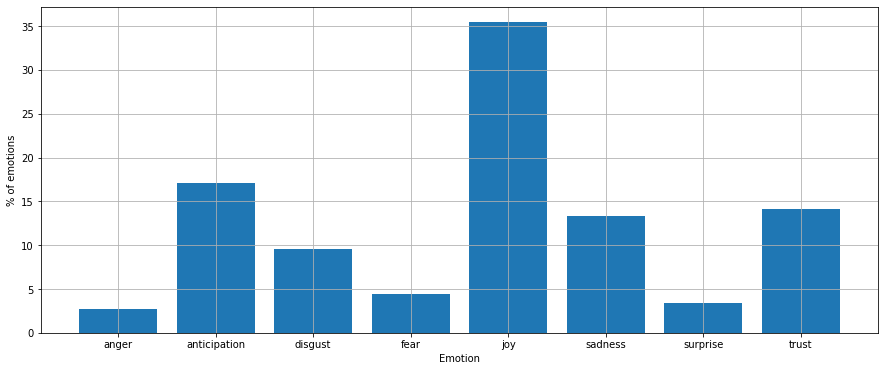

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of emotions')
plt.xlabel('Emotion')

plt.grid(True)

plt.show()

---

## 2. Feature engineering
### 2.1 Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [26]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.m
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [27]:
# check the result
train_data_BOW_features

<1455563x794247 sparse matrix of type '<class 'numpy.int64'>'
	with 18849355 stored elements in Compressed Sparse Row format>

In [28]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [34]:
# add .toarray() to show
#train_data_BOW_features.toarray()

In [30]:
# check the dimension
train_data_BOW_features.shape

(1455563, 794247)

In [31]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['005', '00533321', '00575', '00578', '005796', '005e5n', '006',
       '0060', '007', '00786mujahid'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [32]:
"😂" in feature_names

False

### 2.2 Using another tokenizer in NLTK module

In [35]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(1455563, 500)

In [36]:
train_data_BOW_features_500.toarray()

array([[0, 3, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['can', 'car', 'care', 'change', 'christ', 'christmas', 'closed',
       'come', 'comes', 'coming'], dtype=object)

In [42]:
"😂" in feature_names_500

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_df, test_size=0.1, random_state=42)

In [44]:
print("Shape of Training set: ", train_set.shape)
print("Shape of Testing set: ", test_set.shape)

Shape of Training set:  (1310006, 4)
Shape of Testing set:  (145557, 4)


In [45]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_set['text'])
y_train =train_set['emotion']

X_test = BOW_500.transform(test_set['text'])
y_test = test_set['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1310006, 500)
y_train.shape:  (1310006,)
X_test.shape:  (145557, 500)
y_test.shape:  (145557,)


In [46]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'joy', 'trust', 'joy', 'sadness', 'anticipation',
       'trust', 'sadness', 'anticipation'], dtype=object)

In [47]:
import joblib
joblib.dump(DT_model, 'DT_model_1223.pkl')

# To load the model for new test data
#loaded_DT_model = joblib.load('Ada_model_1119b.pkl')

['DT_model_1223.pkl']

### 3.2 Naive Bayes

In [77]:
import numpy as np
# >>> rng = np.random.RandomState(1)
# >>> X = rng.randint(5, size=(6, 100))
# >>> y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
X=X_train
y=y_train
#clf = MultinomialNB(force_alpha=True)
clf = MultinomialNB()
clf.fit(X, y)
#MultinomialNB(force_alpha=True)
#print(clf.predict(X[2:3]))
#[3]

MultinomialNB()

In [81]:
y_train_pred_NB = clf.predict(X_train)
y_test_pred_NB = clf.predict(X_test)
y_test_pred_NB[:10]

array(['joy', 'joy', 'joy', 'joy', 'joy', 'sadness', 'trust', 'anger',
       'sadness', 'joy'], dtype='<U12')

In [82]:
import joblib
joblib.dump(clf, 'NB_model_1223.pkl')

['NB_model_1223.pkl']

---
## 4. Results Evaluation
### 4.1 Decision Trees

Now we will check the results of our model's performance

In [48]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.97
testing accuracy: 0.41


In [49]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.17      0.15      0.16      4017
anticipation       0.44      0.45      0.45     24769
     disgust       0.25      0.25      0.25     13755
        fear       0.19      0.18      0.19      6399
         joy       0.53      0.56      0.55     51917
     sadness       0.34      0.34      0.34     19180
    surprise       0.21      0.17      0.18      4905
       trust       0.33      0.30      0.32     20615

    accuracy                           0.41    145557
   macro avg       0.31      0.30      0.30    145557
weighted avg       0.40      0.41      0.40    145557



In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[  583   464   540   232  1040   663   112   383]
 [  341 11253  1382   748  6346  1805   410  2484]
 [  427  1524  3466   617  3471  2558   455  1237]
 [  161   884   654  1163  1968   763   188   618]
 [  830  6112  3041  1677 29270  3946   936  6105]
 [  529  2026  2604   806  4583  6444   588  1600]
 [  145   521   582   254  1340   738   811   514]
 [  340  2797  1420   660  6919  1766   430  6283]]


In [51]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [ ]:
emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
dtype: int64

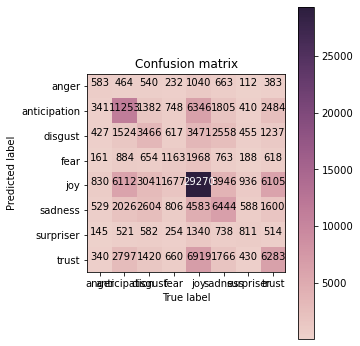

In [52]:
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness','surpriser', 'trust']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### 4.2 Naive Bayes

In [83]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.42
testing accuracy: 0.42


## 5. Predict the precessing dataset(df_test) on Kaggle.

## 5.1 Decision Trees

In [53]:
#from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
# X_train = BOW_500.transform(train_set['text'])
# y_train =train_set['emotion']

X_test2 = BOW_500.transform(df_test['text'])
#y_test = test_set['emotion']

## take a look at data dimension is a good habit  :)
# print('X_train.shape: ', X_train.shape)
# print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape)
# print('y_test.shape: ', y_test.shape)

X_train.shape:  (1310006, 500)
y_train.shape:  (1310006,)
X_test.shape:  (145557, 500)
y_test.shape:  (145557,)


In [ ]:
#import joblib
#joblib.dump(DT_model, 'DT_model_1223.pkl')

# To load the model for new test data
loaded_DT_model = joblib.load('DT_model_1223.pkl')

In [54]:
## predict!
#y_train_pred = DT_model.predict(X_train)
y_test_pred2 = DT_model.predict(X_test2)

## so we get the pred result
y_test_pred2[:10]

array(['joy', 'trust', 'trust', 'anticipation', 'trust', 'anticipation',
       'sadness', 'trust', 'joy', 'anticipation'], dtype=object)

In [55]:
Kaggle_test_pred_df = pd.DataFrame(y_test_pred2, columns=['emotion'])

In [56]:
Kaggle_test_pred_df

,emotion
0,joy
1,trust
2,trust
3,anticipation
4,trust
...,...
411967,anticipation
411968,anticipation
411969,sadness
411970,joy


In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411972 entries, 0 to 411971
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tweet_id        411972 non-null  object 
 1   text            411972 non-null  object 
 2   emotion         0 non-null       float64
 3   identification  411972 non-null  object 
dtypes: float64(1), object(3)
memory usage: 12.6+ MB


In [ ]:
#T4746_ESun_1121 = pd.concat([dp_test['txkey'], ESun_test_pred_df['pred']], axis=1)

In [69]:
Kaggle_test_pred_1223 = pd.concat([df_test['tweet_id'], Kaggle_test_pred_df['emotion']], axis=1)

In [70]:
Kaggle_test_pred_1223

,tweet_id,emotion
0,0x28b412,joy
1,0x2de201,trust
2,0x218443,trust
3,0x2939d5,anticipation
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy


In [72]:
#import pandas as pd

# Assuming 'Kaggle_test_pred_1223' is your DataFrame
# You can read it from a file like this, if it's not already loaded:
# df = pd.read_csv('path_to_your_file.csv')

# Rename the column 'tweet_id' to 'id'
Kaggle_test_pred_1223.rename(columns={'tweet_id': 'id'}, inplace=True)

# Now 'Kaggle_test_pred_1223' has the column renamed. You can check the first few rows to confirm:
print(Kaggle_test_pred_1223.head())


         id       emotion
0  0x28b412           joy
1  0x2de201         trust
2  0x218443         trust
3  0x2939d5  anticipation
4  0x26289a         trust


In [73]:
Kaggle_test_pred_1223.to_csv("./Kaggle_test_pred_1223.csv", index = False,encoding="utf-8-sig")

In [74]:
Kaggle=pd.read_csv("./Kaggle_test_pred_1223.csv",encoding="utf-8-sig")

In [75]:
Kaggle

,id,emotion
0,0x28b412,joy
1,0x2de201,trust
2,0x218443,trust
3,0x2939d5,anticipation
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy


### 5.2 Naive Bayes

In [84]:
y_test_pred3 = clf.predict(X_test2)

## so we get the pred result
y_test_pred3[:10]

array(['anticipation', 'anticipation', 'disgust', 'anticipation',
       'anticipation', 'sadness', 'disgust', 'joy', 'fear', 'joy'],
      dtype='<U12')

In [85]:
Kaggle_test_pred_clf = pd.DataFrame(y_test_pred3, columns=['emotion'])

In [86]:
Kaggle_test_pred_clf

,emotion
0,anticipation
1,anticipation
2,disgust
3,anticipation
4,anticipation
...,...
411967,joy
411968,disgust
411969,joy
411970,joy


In [88]:
Kaggle_test_pred_clf_1223 = pd.concat([df_test['tweet_id'], Kaggle_test_pred_clf['emotion']], axis=1)

In [89]:
Kaggle_test_pred_clf_1223

,tweet_id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,disgust
3,0x2939d5,anticipation
4,0x26289a,anticipation
...,...,...
411967,0x2913b4,joy
411968,0x2a980e,disgust
411969,0x316b80,joy
411970,0x29d0cb,joy


In [90]:
Kaggle_test_pred_clf_1223.rename(columns={'tweet_id': 'id'}, inplace=True)

# Now 'Kaggle_test_pred_1223' has the column renamed. You can check the first few rows to confirm:
print(Kaggle_test_pred_clf_1223.head())


         id       emotion
0  0x28b412  anticipation
1  0x2de201  anticipation
2  0x218443       disgust
3  0x2939d5  anticipation
4  0x26289a  anticipation


In [92]:
Kaggle_test_pred_clf_1223.to_csv("./Kaggle_test_pred_clf_1223.csv", index = False,encoding="utf-8-sig")

### ** The End **  